<a href="https://colab.research.google.com/github/Edu-Moreira/Estudos-de-Python/blob/main/Compara%C3%A7%C3%A3o_ETFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
! pip install investpy 

In [42]:
import investpy as inv
import pandas as pd 
import seaborn as sns 
import time
import matplotlib.pyplot as plt 
import datetime as dt

In [43]:
hoje = dt.date.today()
hoje = hoje.strftime('%d/%m/%Y')
print(hoje)

pais = 'united states'

tipo_etf = 'bond'

12/04/2022


In [44]:
# obtendo a lista de todos os ETFs dos Estados Unidos no Investing.com

lista_etf = inv.get_etfs_dict(pais)


In [45]:
# Para buscar informações especificas de cada ETF 
'''
for i in range(len(lista_etf)):
    if (lista_etf[i]['isin']=='US46434V6130'):
        info = lista_etf[i]['name']
'''

#Obetndo lista com o nome de todos os ETFs
nome_etf = []

for i in range(len(lista_etf)):
  if (lista_etf[i]['asset_class']== tipo_etf):
    nome_etf.append(lista_etf[i]['name'])  

In [46]:
# nome_etf_filtro  = []
# filtro = [s for s in nome_etf if "High Yield" in s]

# for i in range(len(nome_etf)):
#   if(nome_etf[i] == any(filtro)):
#     nome_etf.drop(nome_etf[i])

In [47]:
lista_nomes = []

r = len(nome_etf)//10
for i in range(r+1):
  lista_nomes.append(nome_etf[(i*10):((i*10)+10)])



In [58]:
lista_nomes

[['Peritus High Yield',
  'Newfleet Multi-Sector Income',
  'AdvisorShares Sage Core Reserves',
  'Madrona Global Bond',
  'Anfield Universal Fixed Income',
  'ALPS RiverFront Strategic Income',
  'American Century Diversified Corporate Bond',
  'Arrow Dow Jones Global Yield',
  'iShares iBonds Dec 2025 Term Muni Bond',
  'iShares Inflation Hedged Corporate Bond'],
 ['iShares US Aggregate Bond Acc',
  'iShares $ Short Duration Corp Bond Acc',
  'iShares $ Treasury Bond 3-7Yr UCITS Acc',
  'iShares $ Floating Rate Bond UCITS Acc USD',
  'iShares $ High Yield Corp Bond Acc Share Class',
  'Cambria Global Momentum',
  'Cambria Sovereign Bond',
  'Columbia Multi Sector Municipal Income',
  'Columbia Diversified Fixed Income Allocation',
  'Deutsche Bank FI Enhanced Global High Yield'],
 ['Deutsche X-trackers Municipal Infrastructure Reven',
  'Deutsche X-trackers Investment Grade Bond Interest',
  'Deutsche X-trackers Emerging Markets Bond Interest',
  'Deutsche X-trackers High Yield Corpo

In [49]:
painel = pd.DataFrame()

contador = 0 

for i in range(len(lista_nomes)):
  for j in lista_nomes[i]:
    try:
      painel[j] = inv.get_etf_historical_data(etf = j,country = pais, from_date = '01/01/2015',to_date = hoje)['Close']
      contador = contador + 1
      time.sleep(2)
    except:
      pass


/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "united kingdom" and default stock_exchange: "London".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "germany" and default stock_exchange: "Xetra".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "mexico" and default stock_exchange: "Mexico".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "germany" and default stock_exchange: "Munich".
  Warning,


In [60]:
inv.get_etf_historical_data(etf = 'SPDR Barclays International Corporate Bond',country = pais, from_date = '01/01/2015',to_date = hoje)


ConnectionError: ignored

In [50]:
retorno_painel = painel.pct_change()

In [57]:

painel

""


In [52]:
# import sys

# retorno_painel.to_csv(sys.stdout, sep = ',')

In [53]:
lista_nomes[1][1]

'iShares $ Short Duration Corp Bond Acc'

In [54]:
import io
import requests

url= 'https://github.com/Edu-Moreira/Estudos-de-Python/raw/main/Dados/Dados%20IE.xlsx'
myfile = requests.get(url)

df=pd.read_excel(myfile.content)
print(df)

           Data  USD LC07TRUU   USD SPTR   USD M1CXBRU   USD MIMUEMRN   \
0    1998-12-31       212.0865   1670.006        477.68      267.04001   
1    1999-01-04       212.0641   1668.521        486.52      270.20279   
2    1999-01-05       211.8054   1691.253        489.26      272.39230   
3    1999-01-06       212.1331   1729.083        496.11      278.48300   
4    1999-01-07       211.7084   1725.640        494.54      279.80511   
...         ...            ...        ...           ...            ...   
5790 2022-01-18       616.7014   9595.926       1588.46     1758.11600   
5791 2022-01-19       618.1821   9503.135       1580.24     1755.67800   
5792 2022-01-20       618.8629   9398.964       1590.57     1776.91891   
5793 2022-01-21       620.5297   9221.282       1564.14     1759.46330   
5794 2022-01-24       619.7807   9246.837       1521.55     1727.05400   

      USD LG38TRUU  USD SPTRSMCP   
0         244.2719        186.094  
1         244.2719        186.094  
2  

In [55]:
df.rename(columns= {'Data': 'Date'}, inplace = True)
df_benchmark  = df[['Date','USD LG38TRUU']]
df_benchmark

,Date,USD LG38TRUU
0,1998-12-31,244.2719
1,1999-01-04,244.2719
2,1999-01-05,244.2719
3,1999-01-06,244.2719
4,1999-01-07,244.2719
...,...,...
5790,2022-01-18,491.6966
5791,2022-01-19,491.8776
5792,2022-01-20,493.2359
5793,2022-01-21,493.8587


In [56]:
tot_df = pd.merge(df_benchmark,painel, on = 'Date')
tot_df

KeyError: ignored

In [ ]:
corr_etfs = tot_df.corr()
gla_etfs = corr_etfs['USD LG38TRUU']

etfs_eleitos = gla_etfs.loc[gla_etfs > 0.91]

a = list(etfs_eleitos.index)
a.append('Date')
b = tot_df[a]
b = b.set_index('Date')

In [ ]:
#localizando onde a série começa 
b['Guggenheim BulletShares 2027 Corporate Bond'].isnull().sum()


In [ ]:
b['Guggenheim BulletShares 2027 Corporate Bond'].iloc[950:]

In [ ]:
b = b.loc['20181128':]
c = b /b.loc['20181128']
c.plot(figsize = (21,9))

## <font color = '009dcf'> Cáculo de Tracking Error
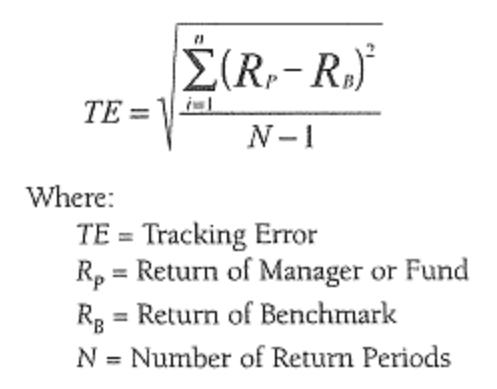

In [ ]:
d = b.pct_change()
d = d[1:]
d



In [ ]:
TE = ((d['USD LG38TRUU'] - d['SPDR Barclays International Treasury Bond'])**2)
TE = np.sqrt(sum(TE))
TE